# Week 2 lecture notes

From Coursera Applied Machine Learning in Python

**Module 2: Introduction to Supervised Machine Learning**

This week we will explore supervised machine learning in greater depth, moving beyond k-NN. 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table(r'../course3_downloads/fruit_data_with_colors.txt')
feature_names_fruits = ['height','width','mass','color_score']

Set up the data. We're working with the same dataset as week 1- the fruits

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [5]:
X = fruits[feature_names_fruits]
y = fruits['fruit_label']
target_names_fruits = ['apple','mandarin','orange','lemon']

X_fruits_2d = fruits[['height','width']]
y_fruits_2d = fruits['fruit_label']

# Supervised learning methods: Overview

We'll look at two simple but powerful prediction algorithms:

* k-nearest neighbors (from week 1, plus regression)
* Linear model fit using least-squares

These represent two complementary approaches to supervised learning:

* k-NN makes few assumptions about the structure of the data and gives potentially accurate but sometimes unstable predictions (sensitive to small changes in the training data)
* Linear models make strong assumptions about the structure of the data and give stable but potentially inaccurate predictions

What is a **model**?  It is a specific mathematical or computational description that expresses the relationship between a set of input variables and one or more outcome variables that are being studied or predicted.

In statistics:

* Input variables: independent variables
* Output variables: dependent variables

In machine learning:

* Features: input / independent
* Target: output / dependent

# Generalization, overfitting, and underfitting

We want the ability to predict the target value on a test set of future examples that haven't been seen before.

Machine learning makes a big assumption: The the future unseen data (test set) will have the same properties as the training set. That is not alway strue.

# Datasets

`scikit-learn` has a bunch of example datasets to work on for learning purposes. 

## Regression

Look at simple linear regression dataset. The following code is going to generate some random linear data.

<IPython.core.display.Javascript object>


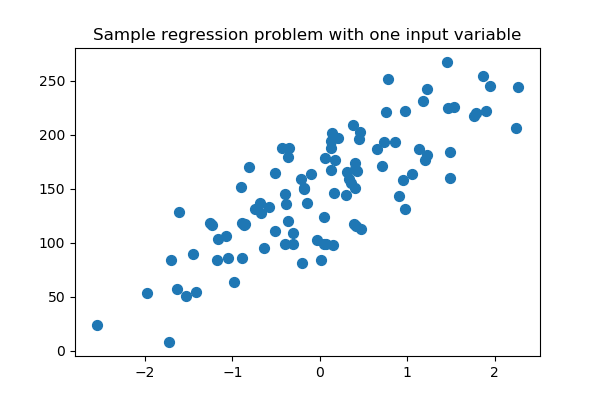

In [6]:
from sklearn.datasets import make_regression
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100,
                             n_features = 1,
                             n_informative = 1,
                             bias = 150.00,
                             noise = 30,
                             random_state = 0)
ax.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

Now make a dataset with two features. 

<IPython.core.display.Javascript object>


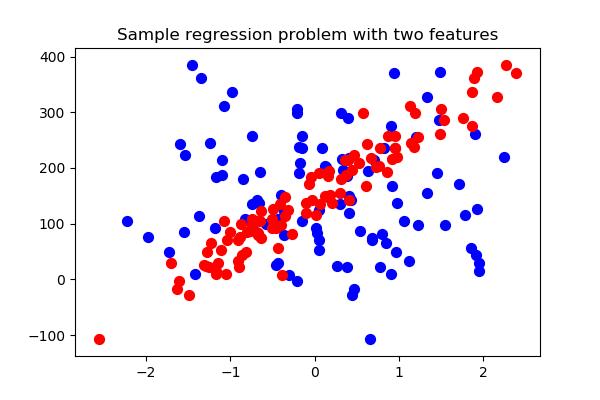

In [7]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

plt.title('Sample regression problem with two features')
X_R1, y_R1 = make_regression(n_samples = 100,
                             n_features = 2,
                             n_informative = 1,
                             bias = 150.00,
                             noise = 30,
                             random_state = 0)
ax.scatter(X_R1[:,0], y_R1, marker='o', c='b', s=50)
ax.scatter(X_R1[:,1], y_R1, marker='o', c='r', s=50)
plt.show()

## Classification

<IPython.core.display.Javascript object>


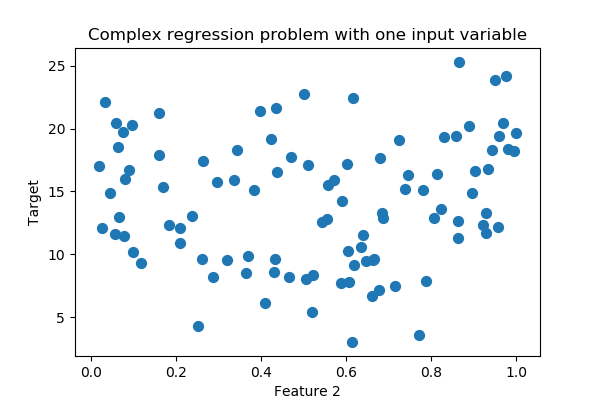

In [8]:
from sklearn.datasets import make_friedman1

fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax.set_title('Complex regression problem with one input variable')

X_F1, y_F1 = make_friedman1(n_samples = 100,
                            n_features = 7,
                            random_state = 0)

ax.scatter(X_F1[:,2], y_F1, marker = 'o', s=50)
ax.set_xlabel('Feature 2')
ax.set_ylabel('Target')
plt.show()

# Linear models and regression

A linear model is a sum of weighted variables that predicts a target output value given an input data. 

May have multiple input features:

$x = (x_0, x_1, ... , x_n)$

Each feature $x_i$ has a corresponding weight $w_i$.

The predicted output is a weighted sum of features plus a constant term.

$\hat{y} = \hat{w_0}x_0 + \hat{w_1}x_1 + ... \hat{w_n}x_n + \hat{b}$

The weights $\hat{w_i}$ and constant term ("bias term") $\hat{b}$ are calculated in the model. 

For example, if the data has one feature $x_0$ and a linear relationship with $\hat{y}$, the model will estimate $w_0$ and $b$ in the training phase.

**Ordinary least-squares** finds the line that minimizes the mean squared error of the model. They are simplistic and make a big assumption about the relationship between $x_i$ and $y$: That there is a linear relationship.

## Try in scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression

In [36]:
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train,y_train)

The intercept $b$

In [37]:
linreg.intercept_

148.44575345658873

The coefficients $w_i$

In [38]:
linreg.coef_

array([45.70870465])

If the attribute ends with an underscore, such as above, that means the quantity was derived from the training data, as opposed to a user setting.

Score it now with the R-squared score. 

Training:

In [39]:
linreg.score(X_train, y_train)

0.6785950771141656

Test:

In [40]:
linreg.score(X_test, y_test)

0.49159615934930306

Plot the solution. 

<IPython.core.display.Javascript object>


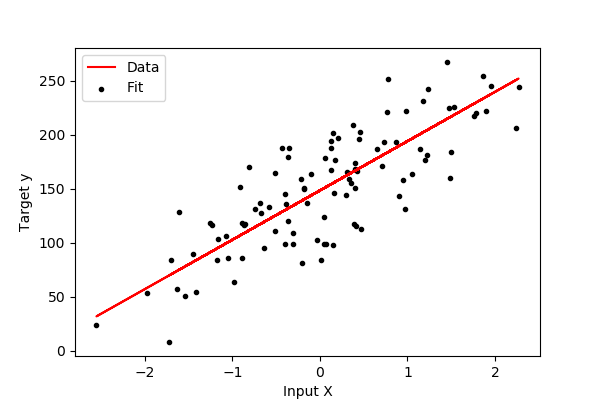

Text(0,0.5,'Target y')

In [46]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax.scatter(X_R1,y_R1,marker='.', color='k')
ax.plot(X_R1,linreg.coef_*X_R1 + linreg.intercept_,'-r')

plt.legend(['Data','Fit'])
ax.set_xlabel('Input X')
ax.set_ylabel('Target y')

## Ridge Regression

Introduces a penalty for weights that are too large. This effectively penalizes large variations across $w$ parameters. This is called "regularization," which is a way to prevent over fitting and to reduce the complexity of the final model. 

You can even set the penalty using the $\alpha$ parameter. Let's try it on the crime data.

88 features, try to predict per capita crime rate. 

In [47]:
import sys
import os
sys.path.append('../course3_downloads/')
from adspy_shared_utilities import load_crime_dataset

os.chdir('../course3_downloads/')
(X_crime, y_crime) = load_crime_dataset()
os.chdir('../week_2/')

In [52]:
X_crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66


In [51]:
y_crime.head()

0     41.02
1    127.56
2    218.59
3    306.64
5    442.95
Name: ViolentCrimesPerPop, dtype: float64

In [53]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

Ridge regreesion linear model intercept:

In [54]:
linridge.intercept_

-3352.4230358459604

Coefficient:

In [55]:
linridge.coef_

array([ 1.95091438e-03,  2.19322667e+01,  9.56286607e+00, -3.59178973e+01,
        6.36465325e+00, -1.96885471e+01, -2.80715856e-03,  1.66254486e+00,
       -6.61426604e-03, -6.95450680e+00,  1.71944731e+01, -5.62819154e+00,
        8.83525114e+00,  6.79085746e-01, -7.33614221e+00,  6.70389803e-03,
        9.78505502e-04,  5.01202169e-03, -4.89870524e+00, -1.79270062e+01,
        9.17572382e+00, -1.24454193e+00,  1.21845360e+00,  1.03233089e+01,
       -3.78037278e+00, -3.73428973e+00,  4.74595305e+00,  8.42696855e+00,
        3.09250005e+01,  1.18644167e+01, -2.05183675e+00, -3.82210450e+01,
        1.85081589e+01,  1.52510829e+00, -2.20086608e+01,  2.46283912e+00,
        3.29328703e-01,  4.02228467e+00, -1.12903533e+01, -4.69567413e-03,
        4.27046505e+01, -1.22507167e-03,  1.40795790e+00,  9.35041855e-01,
       -3.00464253e+00,  1.12390514e+00, -1.82487653e+01, -1.54653407e+01,
        2.41917002e+01, -1.32497562e+01, -4.20113118e-01, -3.59710660e+01,
        1.29786751e+01, -

Score (training):

In [56]:
linridge.score(X_train,y_train)

0.6709349944606453

Score (test):

In [57]:
linridge.score(X_test, y_test)

0.4940490145966749

Number of non-zero features:

In [61]:
sum(linridge.coef_ !=0)

88

It found a weight for all 88 features, but are they all necessary? Time to consider feature normalization, which is a type of pre-processing. 

Apply MinMax scaling, so that all variables are on the same scale between 0 and 1. It applies a simple mathematical transformation:

$x_i' = (x_i-x_i^{MIN})/(x_i^{MAX}-x_i^{MIN})$

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # Set up the scaler with training data

# Now apply the same scaler to train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
clf = Ridge().fit(X_train_scaled,y_train)
r2_score = clf.score(X_test_scaled,y_test)

In [65]:
r2_score

0.5602700804814063

You can even perform the fitting and transforming in one step:

In [66]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # Two steps in one

In [68]:
X_test_scaled  = scaler.transform(X_test)
clf = Ridge(alpha=20.0).fit(X_train_scaled,y_train)
r2_score = clf.score(X_test_scaled,y_test)
r2_score

0.5986066019999294

NOTE: We are applying the scaling to training and testing data. ALSO: We're training the scaler object on the training data, as usual. 

The test set must use identical scaling to the training set. If not, you will end up with random data skew. 

If you instead fit the scaler using any part of the test data, this leads to *data leakage*. The learner should never have access to the test data during the training. 

One challenge of using the scaler is that the scaled data may be harder to interpret. 

## Lasso Regression

Another form of regularized linear regression that uses an L1 regression penalty for training (instead of Ridge's L2 penalty)

Minimize the sum of the *absolute values* of the coefficients. This causes the $w$ values to be set to zero for the least influential variables. This is a *sparse* solution: a kind of feature selection. 

The parameter $\alpha$ controls amount of LI regularization (default = 1.0).

The prediction formula is the same as ordinary least-squares.

* Use ridge when: Many small/medium sized effects
* Use lass when: Only a few variables with medium/large effects

In [69]:
from sklearn.linear_model import Lasso

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [71]:
linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled,y_train)

Intercept:

In [72]:
linlasso.intercept_

1186.6120619985809

Coefficient:

In [73]:
linlasso.coef_

array([    0.        ,     0.        ,    -0.        ,  -168.18346054,
          -0.        ,    -0.        ,     0.        ,   119.6938194 ,
           0.        ,    -0.        ,     0.        ,  -169.67564456,
          -0.        ,     0.        ,    -0.        ,     0.        ,
           0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
         -57.52991966,    -0.        ,    -0.        ,     0.        ,
         259.32889226,    -0.        ,     0.        ,     0.        ,
           0.        ,    -0.        , -1188.7396867 ,    -0.        ,
          -0.        ,    -0.        ,  -231.42347299,     0.        ,
        1488.36512229,     0.        ,    -0.        ,    -0.        ,
          -0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,    -0.        ,     0.        ,
          20.14419415,     0.        ,     0.        ,     0.        ,
      

Non-zero features

In [75]:
sum(linlasso.coef_ != 0 )

20

R-squared score (training)

In [76]:
linlasso.score(X_train_scaled,y_train)

0.6307013668705859

R_squared score (test)

In [77]:
linlasso.score(X_test_scaled,y_test)

0.6421928287487964

## Polynomial feature transformation

$x = (x_0,x_1) \rightarrow x' = (x_0,x_1, x_0^2,x_0 x_1, x_1^2)$

This can transform a problem into a higher-dimension solution space. Like applying polynomial fits rather than just a linear fit. Except that there are multiple input parameters. 

## Logistic Regression

Similar to linear regression, logistic regression calculates the weighted sum of a number of input parameters. However, it does not do a linear sum, but rather a nonlinear function. 

$ \hat{y} = logistic(\hat{b} + \hat{w_1} x_1 + ... + \hat{w_n} x_n)$

$ \hat{y} = 1/(1+\exp[-(\hat{b} + \hat{w_1} x_1 + ... + \hat{w_n} x_n)])$

This compresses the output of a linear function so that it is limited to the target range from 0 to 1. This is useful in the case of a threshold effect. Ex: Test scores vs. hours studying. If you must study at least 3 hours to read all the material, then there will be a critical leap at 3 hours. 

## Linear classifiers: Support Vector Machines

Separate two groups with a line. How can I describe the equation for a line using the $w$ and $b$ parameters from before? The data is either above or below the line (positive or negative).

$f(x,w,b) = sign(w\cdot x+b)$

On the plot: x-axis is $x_1$ and y-axis is $x_2$. The result of $f$ is a 0 or 1, depending on whether a given value is above or below the line.  

If the data has a big gap in the region between the points, you could conceivably draw the line a bunch of different ways. This region over which you could draw the line is called the *classifier margin*. Think of it as the thickness of a line you could draw between the two. *The best classifier will have the maximum classifier margin.* 

Try it out with the cancer data. 

In [86]:
from sklearn.svm import SVC
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)
from sklearn.datasets import make_classification, make_blobs

<IPython.core.display.Javascript object>


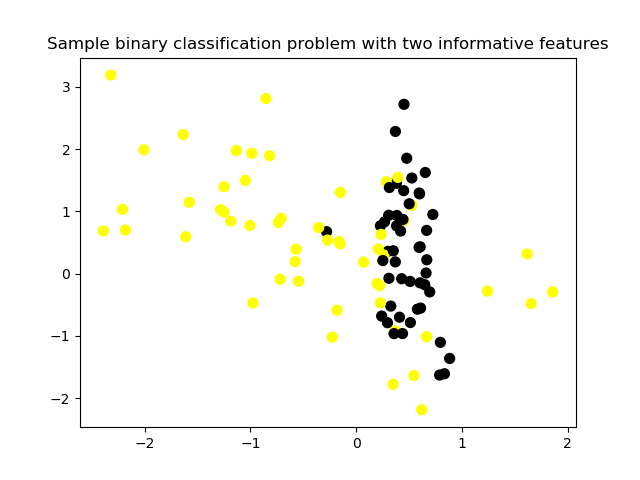

In [87]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

<IPython.core.display.Javascript object>


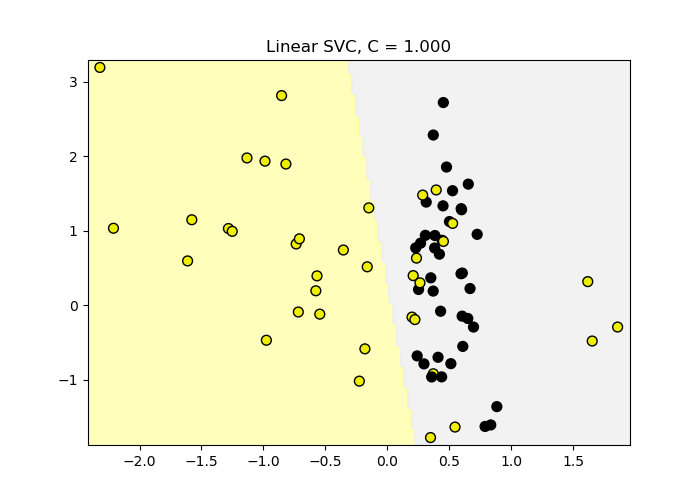

In [89]:
fig, subaxes = plt.subplots(1,1,figsize=(7,5))
this_C=1.0
clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

The C parameters:

The strength of regularization is determined by C.

* Larger values of C: less regularization. Fit the training data as well as possible. Each individual data point is important to classify correctly.
* Smaller values of C: more regularization. More tolerant of errors on individual data points.

Try applying to the cancer dataset.

In [92]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train,y_train)

In [94]:
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Accuracy on training set:

In [95]:
clf.score(X_train,y_train)

0.9295774647887324

Accuracy on test set:

In [96]:
clf.score(X_test, y_test)

0.9440559440559441

## Summary of linear models

PROS

* Simple and easy to train
* Fast prediction
* Scales well to very large datasets
* Works well with sparse data
* Reasons for prediction are relatively easy to interpret

CONS

* For lower-dimensional dat, other models may have superior generalization performance.
* For classification, data may not be linearly separable (more on this in SVMs with non-linear kernels)

# Multi-class classification

In a real-world situation, we're not just classifying as 0 or 1, but rather in a variety of different groups.

Scikit-learn makes it easy by converting a multi-class problem into a series of binary problems. It creates one binary class that compares each category against all the others. So it ends up with $N$ binary classifiers for $N$ categories. For each item, the classifier with the highest score wins that label. 

We can get access to what is going on under the hood as follows. Look at the fruit data. 

In [ ]:
X = fruits[feature_names_fruits]
y = fruits['fruit_label']
target_names_fruits = ['apple','mandarin','orange','lemon']



In [97]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

X_fruits_2d = fruits[['height','width']]
y_fruits_2d = fruits['fruit_label']

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.23401135  0.72246132]
 [-1.63231901  1.15222281]
 [ 0.0849835   0.31186707]
 [ 1.26189663 -1.68097   ]]
Intercepts:
 [-3.31753728  1.19645936 -2.7468353   1.16107418]


<IPython.core.display.Javascript object>


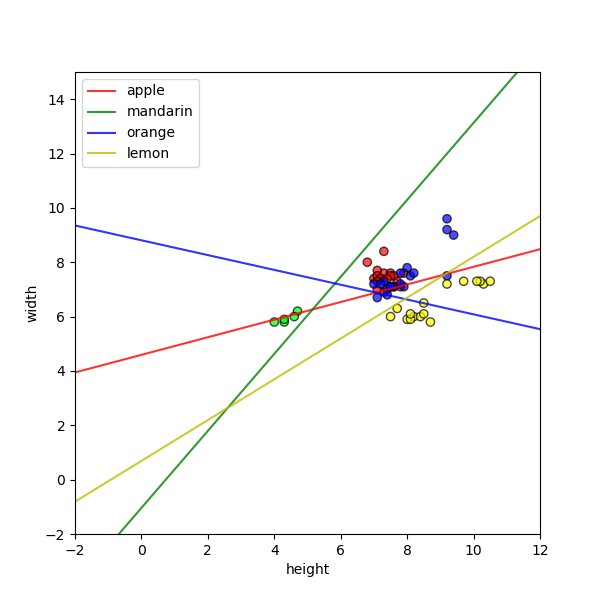

In [154]:
fig = plt.figure(figsize=(6,6)); ax = fig.gca()
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

ax.scatter(X_fruits_2d['height'], X_fruits_2d['width'], 
            c=y_fruits_2d.tolist(), cmap=cmap_fruits, norm=None, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernalized support vector machines (SVC)

These can classify data that is not organized into two regions. Imagine a bunch of blobs scattered about. 

Add a second dimension by squaring the position of each data point. $x_i \rightarrow (x_i, x_i^2)$. Then you can draw a line across an exponential, then transform the data back. 

Overall, you're transforming the data into a "feature space" where you can then apply a linear classifier. A *kernel* is a similarity measure (modified dot product) between data points. 

PROS:

* Can perform well on a range of datasets  
* Versatile: Different kernel functions can be specified, or custom kernels can be defined for specific data types.
* Works well for both low- and high-dimensional data

CONS

* Efficiency (runtime speed and memory usage) decreases as tranining set size increases (e.g. over 50000 samples)
* Needs scareful normalization of input data and parameter tuning
* Does not provide direct probability estimates (but can be estimated using e.g. Platt scaling)
* Difficult to interpret why a prediction was made

Model complexity:

* kernel: Type of kernel function to be used. Default = 'rbf' for radial basis function. Other types include 'polynomial'
* kernal parameters: gamma $\gamma$: RBF kernel width
* C: regularization parameter
* Typically C and gamma are tuned at the same time

# Cross-validation

Uses multiple Train/Test splits, each of which is used to train and evaluate a separate model.

For example, split a dataset into 5 pieces (folds). Then evaluate five models with different splits.

* Model 1: Train on folds 1-4, test on 5
* Model 2: Train on folds 2-5, test on 1
* etc...




In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5)

In [161]:
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y)
cv_scores

array([0.77272727, 0.73684211, 0.83333333])

# Decision Trees

A popular supervised learning method for regression and classification. Learn a series of if-then rules for predicting the target value. The goal is to minimize the number of steps in performing the classification.

Overfitting happens when you create too many branches and leaves to correctly classify all of the training data. 

These videos are going on too long... I'm hardly watching it. 

PROS:

* Easily visualized and interpreted
* No feature normalization or scaling typically needed
* Work well with datasets using a mixture of feature types (continuous, categorical, binary)


CONS:

* Even after tuning, decision trees can often still overfit
* Usually need an ensemble of trees for better genrealization performance